# Is My Train Late?
(A Project for TUT's Data Science Introduction Course)

The data that we will use is in the files `X.csv` and `y.csv`. If it needs to be recreated, it can be done by first deleting the `X.csv` and `y.csv` files and then running `python3 parse.py`. The data is read from `weatherdata/*` and `traindata/*`, and the script will combine the data into a feature DataFrame and a regression target DataFrame, which will be saved into files `X.csv` and `y.csv`, respectively. 

Note that due to the high amount of data, this operation ***takes almost 2 hours to complete*** on an average computer, so please think twice before doing it.

## Reading and exploring the data

In [9]:
import pandas as pd
from parse import getData

In [10]:
X, y = getData()
X_join_y = X.join(y)

Let's explore what kind of data we have here in variables X and y. X will contain the data that can be used for regression prediction purposes (train data), whilst y contains the prediction targets (average delay in minutes).

In [11]:
X.head()

departureStation        departureTime  rainIntensity  snowDepth  \
0              HKI  2017-01-01 05:23:00            0.0        0.0   
1              HKI  2017-01-01 08:17:00            0.0        0.0   
2              HKI  2017-01-01 11:17:00            0.0        0.0   
3              JNS  2017-01-01 07:17:00            0.0       23.0   
4              HKI  2017-01-01 13:17:00            0.0        0.0   

   temperature  tripDuration type  visibility  windSpeed  
0          2.8         257.0   IC         NaN        2.8  
1          2.1         263.0   IC         NaN        2.4  
2          1.7         263.0   IC         NaN        2.0  
3          0.5         265.0   IC     19110.0        NaN  
4          1.3         246.0   IC         NaN        2.2

In [12]:
y.head()

averageDelayInMinutes
0               0.992424
1               4.643939
2               4.181818
3               0.469697
4               0.803030

We should also check the types of the data before doing anything. It seems that `departureTime` is for some reason an object, but it should be in a datetime format, so convert it.

In [13]:
X.dtypes

departureStation     object
departureTime        object
rainIntensity       float64
snowDepth           float64
temperature         float64
tripDuration        float64
type                 object
visibility          float64
windSpeed           float64
dtype: object

In [14]:
X['departureTime'] = X['departureTime'].astype('datetime64[ns]')

In [15]:
y.dtypes

averageDelayInMinutes    float64
dtype: object

In [16]:
len(X)

87804

How late are all trains on average and what is the min and max value for the delay?

In [17]:
y['averageDelayInMinutes'].mean()

3.705828630172348

## Visualizations

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
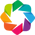

In [18]:
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
%output size=200

Firstly, visualize the temperature against the departure time. We should be able to see the effect of the seasons here.

In [19]:
hv.Scatter(X.sort_values('departureTime'), 'departureTime', 'temperature')

:Scatter   [departureTime]   (temperature)

Strip away all data recorded after 6/2018 because it seems that the temperature data is corrupted after that...

In [61]:
X_clean = X_join_y[X_join_y['departureTime'] < pd.to_datetime('2018-06-01')]
y_clean = X_clean['averageDelayInMinutes'].to_frame()
X_clean = X_clean.drop(columns='averageDelayInMinutes')
hv.Scatter(X_clean.sort_values('departureTime'), 'departureTime', 'temperature')

:Scatter   [departureTime]   (temperature)

### Which types of trains depart from which stations

In [21]:
hv.Scatter(X_clean, 'type', 'departureStation')

:Scatter   [type]   (departureStation)

### How much snow is there depending on the departure date

In [22]:
hv.Scatter(X_clean, 'departureTime', 'snowDepth')

:Scatter   [departureTime]   (snowDepth)

### How much snow there is on average depending on the departure station

In [23]:
stations_snowdepth_mean = X_clean.groupby('departureStation')['snowDepth'].mean().to_frame()
hv.Curve(stations_snowdepth_mean.sort_values('snowDepth'), 'departureStation', 'snowDepth')

:Curve   [departureStation]   (snowDepth)

### What train types take longer journeys on average

In [59]:
types_length_mean = X_clean.groupby('type')['tripDuration'].mean().to_frame()
types_length_mean.sort_values('tripDuration').rename(columns={'tripDuration': 'averageTripDuration'})

averageTripDuration
type                     
P              132.337095
S              205.103554
IC             208.255509

### How late different train types are on average

In [58]:
types_late_mean = X_join_y.groupby('type')['averageDelayInMinutes'].mean().to_frame()
types_late_mean.sort_values('averageDelayInMinutes').rename(columns={'averageDelayInMinutes': 'averageDelayInMinutesMean'})

averageDelayInMinutesMean
type                           
P                      1.796177
S                      2.879896
IC                     3.938228

### Standard devations of the delays of different train types

In [57]:
types_late_std = X_join_y.groupby('type')['averageDelayInMinutes'].std().to_frame()
types_late_std.sort_values('averageDelayInMinutes').rename(columns={'averageDelayInMinutes': 'averageDelayInMinutesSTD'})

averageDelayInMinutesSTD
type                          
P                     5.352866
S                     6.817480
IC                    8.380875

### How the depth of snow affects the average delay

In [26]:
types_late_mean = X_join_y.groupby('snowDepth')['averageDelayInMinutes'].mean().to_frame()
hv.Curve(types_late_mean.sort_values('snowDepth'), 'snowDepth', 'averageDelayInMinutes')

:Curve   [snowDepth]   (averageDelayInMinutes)

### How the temperature affects the average delay

In [27]:
types_late_mean = X_join_y.groupby('temperature')['averageDelayInMinutes'].mean().to_frame()
hv.Curve(types_late_mean.sort_values('temperature'), 'temperature', 'averageDelayInMinutes')

:Curve   [temperature]   (averageDelayInMinutes)

In [28]:
types_late_mean = X_join_y.groupby('windSpeed')['averageDelayInMinutes'].mean().to_frame()
hv.Curve(types_late_mean.sort_values('windSpeed'), 'windSpeed', 'averageDelayInMinutes')

:Curve   [windSpeed]   (averageDelayInMinutes)

### How the trip duration affects the average delay

In [29]:
types_late_mean = X_join_y.groupby('tripDuration')['averageDelayInMinutes'].mean().to_frame()
hv.Curve(types_late_mean.sort_values('tripDuration'), 'tripDuration', 'averageDelayInMinutes')

:Curve   [tripDuration]   (averageDelayInMinutes)

### How the departure station affects the average delay

In [30]:
stations_snowdepth_mean = X_join_y.groupby('departureStation')['averageDelayInMinutes'].mean().to_frame()
hv.Curve(stations_snowdepth_mean.sort_values('departureStation'), 'departureStation', 'averageDelayInMinutes')

:Curve   [departureStation]   (averageDelayInMinutes)

## Machine Learning

Before attempting prediction, we should look at which features to use from the data. Let's check how many NaN values each weather attribute contains:

In [31]:
X_join_y['snowDepth'].isna().sum()

21763

In [32]:
X_join_y['temperature'].isna().sum()

17

In [33]:
X_join_y['visibility'].isna().sum()

37047

In [34]:
X_join_y['rainIntensity'].isna().sum()

21211

In [35]:
X_join_y['windSpeed'].isna().sum()

14721

Based on the results above, we can see that many of the values for snow depth, visibility and rain intensity are missing. That is very unfortunate, as if say 25% of the values of some attribute are `NaN`, it is not very usable for making predictions, and by setting it to 0 we would make errors. It seems that the weather data is missing very many measurements.

We could try to make some assumptions by extending the data so that the previously measured value would hold for longer, e.g. the snow depth would be same as yesterday's value if today's was missing. However, this would make things overly complicated so let's just keep the `temperature` attribute with us because those values do not contain very many `NaN`s.

In [ ]:
X_join_y_subset = X_join_y.drop(columns=['snowDepth', 'visibility'])
X_join_y_subset = X_join_y_subset.dropna()
y_clean = X_join_y_subset['averageDelayInMinutes'].to_frame()
X_clean = X_join_y_subset.drop(columns=['averageDelayInMinutes'])

In addition, we need to drop the departure time attribute, as it can not be used for one-hot-encoding.

In [ ]:
X_hot_encoded = pd.get_dummies(X_clean.drop(columns=['departureTime']))
X_hot_encoded.head()

In [86]:
X_hot_encoded.dtypes

snowDepth               float64
temperature             float64
tripDuration            float64
visibility              float64
windSpeed               float64
departureStation_HKI      uint8
departureStation_JY       uint8
departureStation_KAJ      uint8
departureStation_LH       uint8
departureStation_OL       uint8
departureStation_PRI      uint8
departureStation_VS       uint8
type_IC                   uint8
type_P                    uint8
type_S                    uint8
dtype: object

We will be using some regressor provided by the Scikit-Learn library for predicting the train delay times from the features. For this task, we will use the Lasso and ElasticNet models as recommended by the so called [Scikit-Learn cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for data with less than 100K samples and few features.

In [90]:
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from sklearn.svm import SVR
estimators = {
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3),
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Orthogonal Matching Pursuit': OrthogonalMatchingPursuit(),
    'SVR': SVR(kernel='linear')
}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(
    X_hot_encoded, y_clean, test_size=0.2, random_state=42)
results = []
for name, estimator in estimators.items():
    estimator.fit(X_train, np.ravel(y_train))
    results.append({'EstimatorName': name, 'MedianAbsoluteError': median_absolute_error(y_test, estimator.predict(X_test))})
results = pd.DataFrame(results)
results


In [89]:
best_estimator = results.loc[results['MedianAbsoluteError'].idxmin()]
print(f"The best estimator was '{best_estimator['EstimatorName']}' with an Mean absolute error of {best_estimator['MedianAbsoluteError']}")

The best estimator was 'Ridge' with an Mean absolute error of 2.596321502547967


In [41]:
show_values = 6
to_predict = X_test.iloc[:show_values]
true_values = y_test.iloc[:show_values]
to_predict

temperature  departureStation_HKI  departureStation_JNS  \
12359          2.5                     0                     0   
59805         -8.8                     1                     0   
84363         10.4                     1                     0   
66858          5.8                     1                     0   
50636         -2.3                     0                     0   
44217          1.4                     1                     0   

       departureStation_JY  departureStation_KAJ  departureStation_KUO  \
12359                    0                     0                     0   
59805                    0                     0                     0   
84363                    0                     0                     0   
66858                    0                     0                     0   
50636                    0                     0                     0   
44217                    0                     0                     0   

       departureStation_KV  departureStation_LH  departureStation_OL  \
12359                    0                    0                    0   
59805                    0                    0                    0   
84363                    0                    0                    0   
66858                    0                    0                    0   
50636                    0                    0                    1   
44217                    0                    0                    0   

       departureStation_PRI  departureStation_ROI  departureStation_TKU  \
12359                     0                     0                     1   
59805                     0                     0                     0   
84363                     0                     0                     0   
66858                     0                     0                     0   
50636                     0                     0                     0   
44217                     0                     0                     0   

       departureStation_TPE  departureStation_VS  type_IC  type_P  type_S  
12359                     0                    0        1       0       0  
59805                     0                    0        1       0       0  
84363                     0                    0        1       0       0  
66858                     0                    0        1       0       0  
50636                     0                    0        1       0       0  
44217                     0                    0        1       0       0

In [54]:
estimators[best_estimator['EstimatorName']].predict(to_predict)

array([3.76855349, 4.03801349, 3.58016995, 3.68986163, 3.88301438,
       3.79478411])

In [55]:
true_values

averageDelayInMinutes
12359               2.538462
59805               1.016129
84363               5.360000
66858               0.967742
50636               3.961538
44217               3.661290